In [2]:
!pip install ultralytics

Active code page: 65001


In [3]:
import json
import os
import pandas as pd
import numpy as np
from ultralytics import YOLO
from sklearn.metrics.pairwise import cosine_distances, euclidean_distances

In [7]:
with open('../data/id2ing.json', 'r') as f:
    id2ing = json.load(f)

In [8]:
only_robo_df = pd.read_pickle('../data/only_robo_df.pkl')

In [9]:
model = YOLO('../data/epoch_150_lr_0.001.pt (1).pt')

In [10]:
names = model.names

In [11]:
with open('../data/id2ing.json', 'r') as f:
    id2ing = json.load(f)

In [12]:
with open('../data/ing2id.json', 'r') as f:
    ing2id = json.load(f)

----

In [13]:
only_robo_df

,id,name,new_ingredients,minutes,steps,description,vege/vegan,food type,healthiness,new_ingredients_idx
0,23933,chinese candy,"[salt, butter, noodle]",15,['melt butterscotch chips in heavy saucepan ov...,"a little different, and oh so good. i include ...",non-vegan,dish,unhealthy,"[71, 12, 54]"
1,111875,the elvis smoothie,"[banana, sugar, butter, milk]",2,"['place all ingredients in blender', 'blend un...","this is a great smoothie, thick and creamy. my...",non-vegan,dish,healthy,"[5, 76, 12, 52]"
2,101115,no name beef recipe loco moco,"[beef, rice, onion, egg]",30,"['cook rice according to package directions', ...",i saw this dish on a tv travel channel. it was...,non-vegan,dish,healthy,"[7, 69, 57, 32]"
3,163238,the creamed dried beef chipped beef recipe,"[pepper, beef, flour, butter, milk]",75,"['melt butter in 2 quart sauce pan or larger',...",this is a long-time favorite recipe of our lan...,non-vegan,dish,healthy,"[62, 7, 37, 12, 52]"
4,16327,creamed spinach,"[spinach, onion, cheese, yogurt]",12,['i keep drained yogurt available in my fridge...,i created this recipe one evening when i wante...,non-vegan,dish,unhealthy,"[73, 57, 19, 81]"
...,...,...,...,...,...,...,...,...,...,...
2788,326105,zucchini with bacon corn peppers,"[pepper, onion, cheese, zucchini, corn, garlic...",45,"['in a wide frying pan , cook your bacon until...",this is a very colorful addition to any meal. ...,non-vegan,dish,unhealthy,"[62, 57, 19, 82, 29, 38, 4]"
2789,54175,zucchini with green peppercorns lemon and par...,"[pepper, salt, cheese, zucchini, oil, lemon]",10,"['whisk together the lemon juice , olive oil ,...",saw this on foodtv's cooking thin show. it is ...,non-vegan,dish,unhealthy,"[62, 71, 19, 82, 56, 47]"
2790,320622,zucchini with jalapeno monterey jack,"[pepper, flour, zucchini]",10,['spread the zucchini in a microwave-safe dish...,simple and yummy!,non-vegan,dish,unhealthy,"[62, 37, 82]"
2791,152200,zucchini with parmesan,"[pepper, salt, cheese, zucchini, oil]",40,['heat oil in a large skillet over medium heat...,"this recipe came from ""eating well"" magazine, ...",non-vegan,dish,unhealthy,"[62, 71, 19, 82, 56]"


In [27]:
from PIL import Image

In [30]:
# 가상 시나리오로 한다면 아래 경로는 내가 방금 찍은 식재료 사진 경로.
image_dir = '../data/test2/images'

In [31]:
predictions = list()
ingredients = list()
images = list()
for img_file in os.listdir(image_dir)[:10]: # 이미지 디렉토리에서 10개 랜덤으로 선택
    img_path = os.path.join(image_dir,img_file)
    prediction = np.zeros(len(ing2id))
    ingreds = list()
    result = model.predict(img_path)
    yhat = result[0].boxes.cls.detach().cpu().numpy()
    for y in yhat:
        ingreds.append(names[y])
        idx = ing2id[names[y]]
        prediction[idx] = 1
    predictions.append(prediction)
    ingredients.append(ingreds)
    images.append(Image.open(img_path))
predictions = np.asarray(predictions)


image 1/1 C:\Users\miy\Documents\ds_study\source_code\..\data\test2\images\-140_jpg.rf.e883c9db8fec8d38410344714e4dbb24.jpg: 320x320 1 cheese, 2881.3ms
Speed: 36.9ms preprocess, 2881.3ms inference, 61.8ms postprocess per image at shape (1, 3, 320, 320)

image 1/1 C:\Users\miy\Documents\ds_study\source_code\..\data\test2\images\-53_jpg.rf.a1e2e9ac9458b454aa7374b0ac7fb84d.jpg: 320x320 1 cheese, 2743.7ms
Speed: 9.0ms preprocess, 2743.7ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 320)

image 1/1 C:\Users\miy\Documents\ds_study\source_code\..\data\test2\images\00000437_jpg.rf.d2a6e20c9b815befcd989214f0a5026b.jpg: 320x320 2 cheeses, 2495.3ms
Speed: 8.0ms preprocess, 2495.3ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 320)

image 1/1 C:\Users\miy\Documents\ds_study\source_code\..\data\test2\images\000024_jpg.rf.b53ab1485804650d1d43fc3dd05b286a.jpg: 320x320 6 milks, 2960.1ms
Speed: 1.0ms preprocess, 2960.1ms inference, 10.0ms postprocess per image at shape (

In [32]:
key = list()
for ingred in only_robo_df['new_ingredients']:
    template = np.zeros(len(ing2id))
    for ing in ingred:
        idx = ing2id[ing]
        template[idx] = 1
    key.append(template)
key = np.asarray(key)

-----

In [33]:
distance_matrix = euclidean_distances(predictions, key)

In [35]:
idx = 9

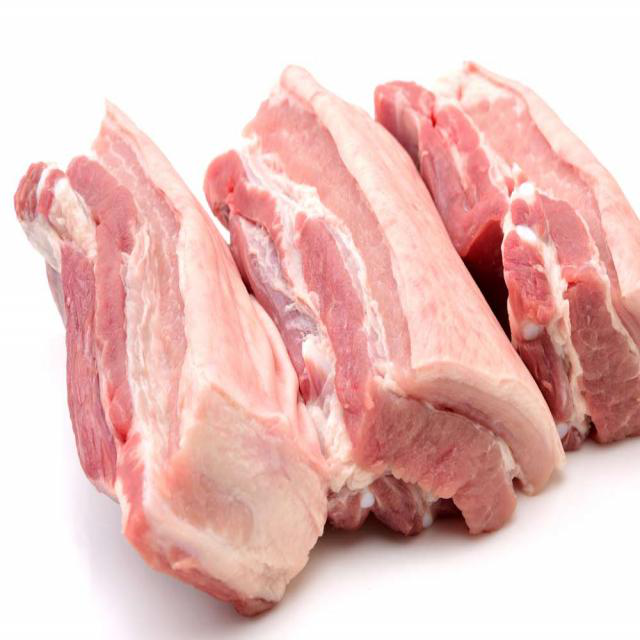

In [36]:
image = images[idx]
image

In [37]:
# Yolo로 예측한 재료
ingredients[idx]

['pork', 'pork', 'pork']

In [41]:
# 가장 유사도가 높은 음식 5개
top_5 = distance_matrix[idx].argsort()[:5]
only_robo_df.iloc[top_5]

,id,name,new_ingredients,minutes,steps,description,vege/vegan,food type,healthiness,new_ingredients_idx
1932,38272,peppered pork tenderloin,"[pepper, pork]",55,"['trim off excess fat and discard', 'mix spice...",these spices add a nice flavor to this roast. ...,non-vegan,dish,unhealthy,"[62, 64]"
2111,156999,roast pork shoulder,"[salt, pork]",195,"['rinse and pat roast dry with a paper towel',...","total time: 3 hours, 35 minutes, plus 2 hours ...",non-vegan,dish,healthy,"[71, 64]"
1987,135515,pork grilled with seasoned salt,"[salt, pork]",15,"['coat both sides of pork chops with salt', 'm...",this is an easy and very quick recipe having 2...,non-vegan,dish,unhealthy,"[71, 64]"
149,238380,bacon wrapped pork tenderloin on the grill or ...,"[pork, bacon]",35,['marinate tenderloins in recipe #70178 as dir...,"we love this easy grilling recipe, and so does...",non-vegan,dish,healthy,"[64, 4]"
478,153490,cedar plank pork loin,"[oil, pork]",65,"['start with an untreated cedar plank', 'make ...","i know it sounds strange, but this really work...",non-vegan,dish,unhealthy,"[56, 64]"
